In [2]:
import statsmodels.api as sm
import matplotlib
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df = pd.read_excel('Sample - Superstore.xls')


In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [6]:
furniture  = df.loc[df['Category']== 'Furniture']

In [7]:
furniture.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [8]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [9]:
furniture['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [10]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [11]:
cols = ['Row ID','Order ID',
          'Order Date',     
          'Ship Date',      
          'Ship Mode',      
          'Customer ID',    
          'Customer Name',  
          'Segment',        
          'Country',        
          'City',           
          'State',          
          'Postal Code',    
          'Region',         
          'Product ID',     
          'Category',       
          'Sub-Category',   
          'Product Name',   
          'Sales',          
          'Quantity',       
          'Discount',       
          'Profit']


In [12]:
furniture[furniture['Sales']==furniture['Sales'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8183,8184,CA-2017-155642,2017-05-18,2017-05-22,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Chicago,...,60653,Central,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,1.892,1,0.6,-0.9933


In [13]:
furniture[furniture['Sales']==furniture['Sales'].max()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7243,7244,CA-2017-118892,2017-08-17,2017-08-22,Second Class,TP-21415,Tom Prescott,Consumer,United States,Philadelphia,...,19134,East,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.3,-630.882


In [14]:
cols

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [15]:
furniture = furniture.sort_values('Order Date')
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7474,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
7660,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
866,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
716,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2978,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,7637,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250
7632,7633,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
5131,5132,CA-2017-146626,2017-12-29,2018-01-05,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,92804,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144
7635,7636,US-2017-158526,2017-12-29,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842


In [16]:
furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [17]:
furniture.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [18]:
furniture = furniture.set_index('Order Date')

In [19]:
y = furniture['Sales'].resample('MS').mean()
print(y['2017':])

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64


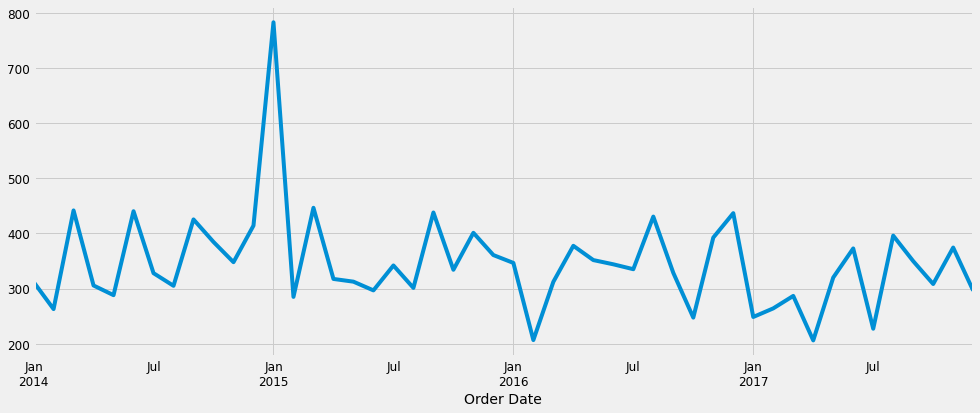

In [20]:
#DATA VISUALIZATION
y.plot(figsize=(15,6))
plt.show()

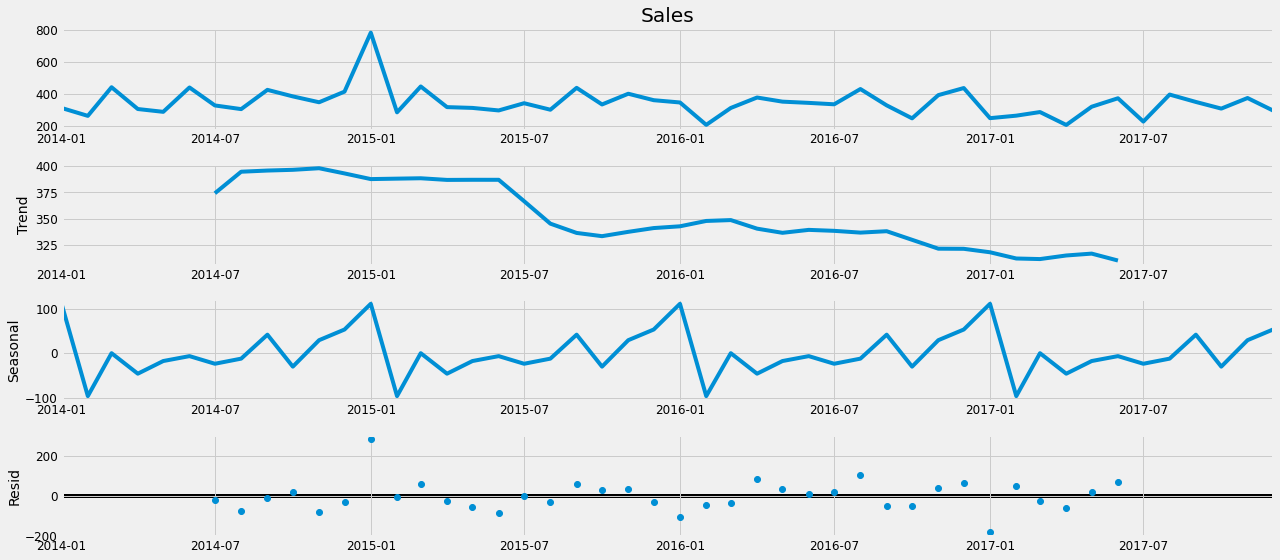

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y,model= 'addictive')
fig = decomposition.plot()
plt.show()

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA....')
print('SARIMAX : {} x {}'. format(pdq[1], seasonal_pdq[1]))
print('SARIMAX : {} x {}'. format(pdq[1], seasonal_pdq[2]))
print('SARIMAX : {} x {}'. format(pdq[2], seasonal_pdq[3]))
print('SARIMAX : {} x {}'. format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA....
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationary=False,
                                            enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA {} x{} 23 -ARC:{}'.format(param,
                param_seasonal, result.aic))
        except:
            continue


ARIMA (0, 0, 0) x(0, 0, 0, 12) 23 -ARC:702.6705312928079
ARIMA (0, 0, 0) x(0, 0, 1, 12) 23 -ARC:2028.4152783037498
ARIMA (0, 0, 0) x(0, 1, 0, 12) 23 -ARC:453.9753787460693
ARIMA (0, 0, 0) x(0, 1, 1, 12) 23 -ARC:445.70342838005
ARIMA (0, 0, 0) x(1, 0, 0, 12) 23 -ARC:628.5073497908609
ARIMA (0, 0, 0) x(1, 0, 1, 12) 23 -ARC:1637.6267025889417
ARIMA (0, 0, 0) x(1, 1, 0, 12) 23 -ARC:449.85654362896173
ARIMA (0, 0, 0) x(1, 1, 1, 12) 23 -ARC:447.66543172384945
ARIMA (0, 0, 1) x(0, 0, 0, 12) 23 -ARC:668.148017933534
ARIMA (0, 0, 1) x(0, 0, 1, 12) 23 -ARC:2124.154172854077
ARIMA (0, 0, 1) x(0, 1, 0, 12) 23 -ARC:455.46079304342555
ARIMA (0, 0, 1) x(0, 1, 1, 12) 23 -ARC:447.605234171482
ARIMA (0, 0, 1) x(1, 0, 0, 12) 23 -ARC:623.1645142919466
ARIMA (0, 0, 1) x(1, 0, 1, 12) 23 -ARC:1805.2701539321733
ARIMA (0, 0, 1) x(1, 1, 0, 12) 23 -ARC:451.7948630420443
ARIMA (0, 0, 1) x(1, 1, 1, 12) 23 -ARC:449.54564411253887
ARIMA (0, 1, 0) x(0, 0, 0, 12) 23 -ARC:592.3531323021211
ARIMA (0, 1, 0) x(0, 0, 1, 1

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = (1,1,1),
                                seasonal_order = (1,1,0,12),
                                enforce_stationary = False,
                                enforce_invertibility = False)
mod.fit()


In [25]:
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0159      0.251     -0.063      0.949      -0.508       0.476
ma.L1         -1.0000      0.233     -4.291      0.000      -1.457      -0.543
ar.S.L12      -0.4843      0.078     -6.213      0.000      -0.637      -0.332
sigma2      1.245e+04   1.87e-05   6.65e+08      0.000    1.24e+04    1.24e+04


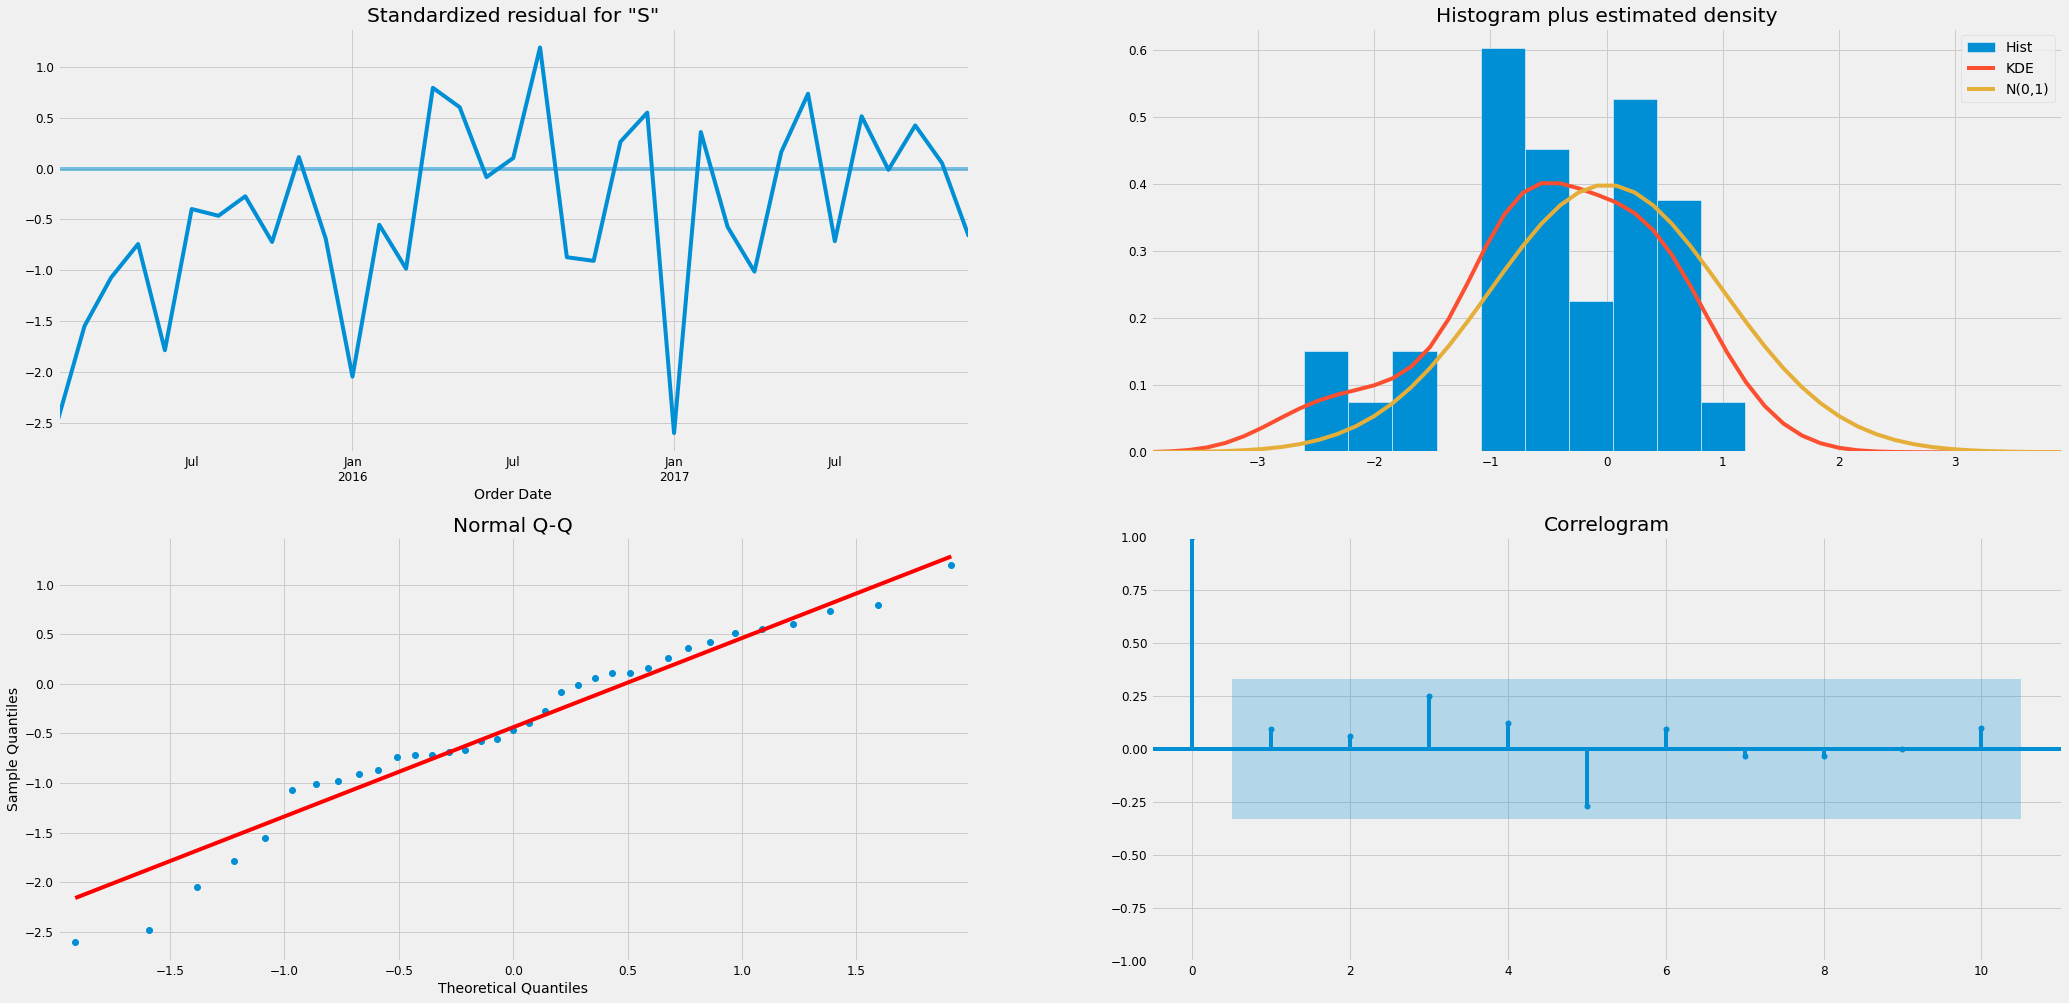

In [26]:
results.plot_diagnostics(figsize=(32,16))
plt.show()

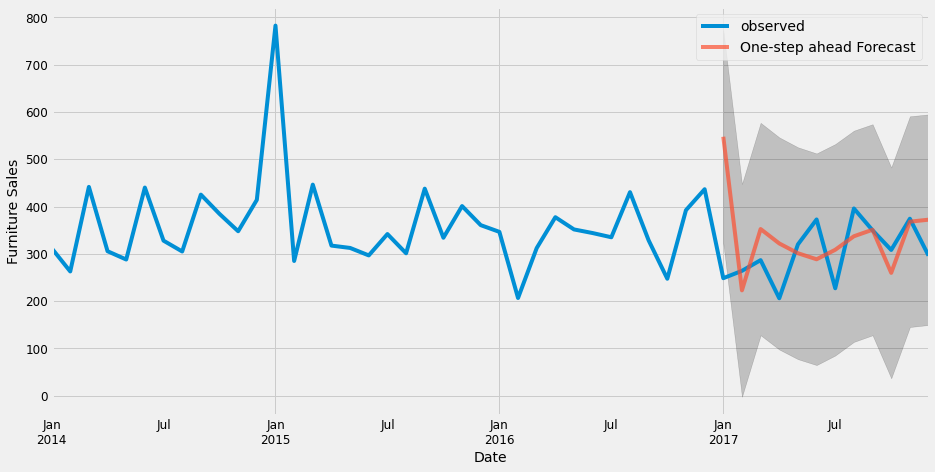

In [27]:
#Time series forecasting with ARIMA
pred = results.get_prediction(
    start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
                         alpha=.7,
                         figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color = 'k',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [28]:
#Validating forecasts
y_forecasted = pred.predicted_mean
y_truth =  y['2017-01-01':]
mse = ((y_forecasted - y_truth)** 2).mean()
print('The Mean Square Error of the Forecast is {}'.format(round(mse,2)))
print('The Root Mean Square Error of our forecast is {}'.format(round(np.sqrt(mse),2)))

The Mean Square Error of the Forecast is 11222.26
The Root Mean Square Error of our forecast is 105.94


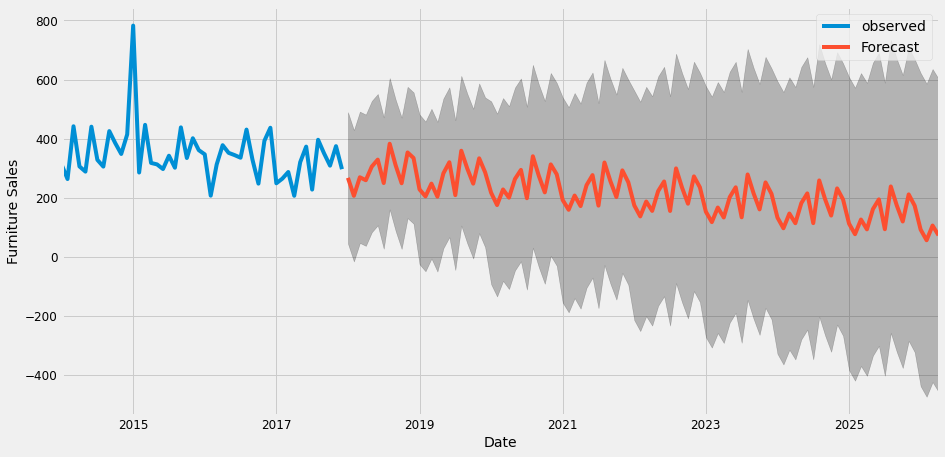

In [29]:
#Producing visualization forecasts
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [30]:
#comparing the model with other categories
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)
office.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office =office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [31]:
furniture.head(5)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [32]:
office.head(5)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [33]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date': y_furniture.index,
                          'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index,
                       'Sales': y_office.values})
store = furniture.merge(office, how = 'inner',on='Order Date')
store.rename(columns = {'Sales_x':'furniture_sales','Sale_y':'office_sales'},inplace = True)
store.head()

,Order Date,furniture_sales,Sales_y
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


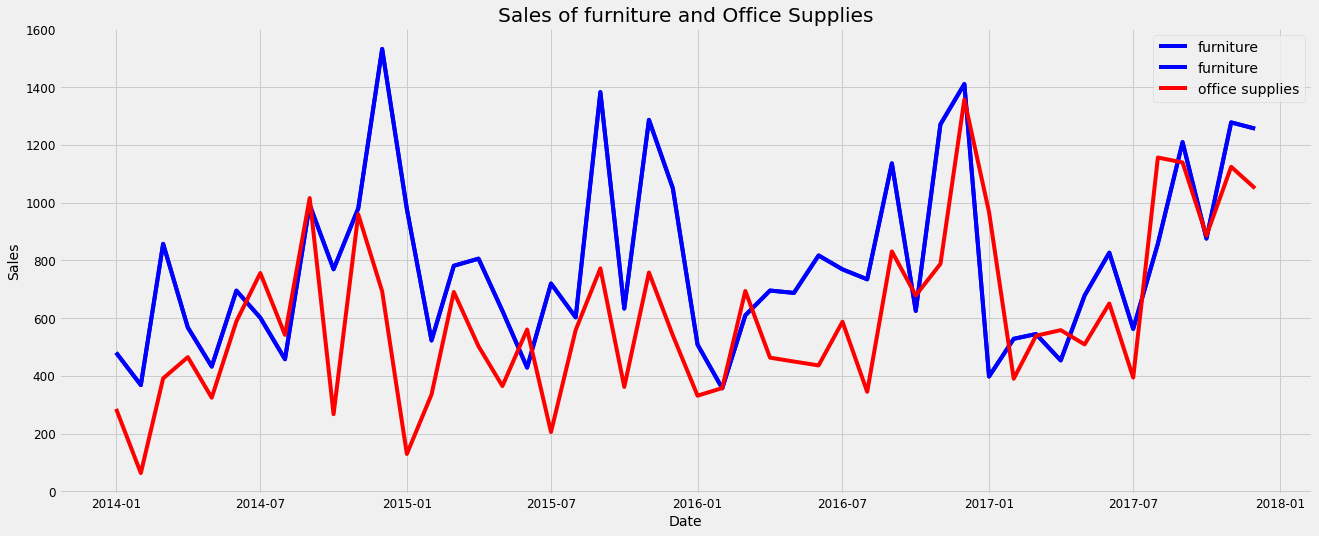

In [34]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['furniture_sales'],'b-',label = 'furniture')
plt.plot(store['Order Date'],store['furniture_sales'],'b-',label='furniture')
plt.plot(store['Order Date'], store['Sales_y'],
         'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and Office Supplies')
plt.legend()